# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Akmal Shahib Maulana
- Email: akmalshahibmaulana@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

1. Apakah langkah yang tepat untuk menjaga kestabilan usaha bike-sharing berdasarkan rekap data rental pada 2 tahun terakhir ?
2. Faktor apa saja yang mempengaruhi jumlah rental sepeda pada 2 tahun terakhir dan keputusan apa yang harus diambil agar adanya peningkatan jumlah rental yang signifikan ?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
data_day = pd.read_csv('day.csv')
data_hour = pd.read_csv('hour.csv')

pada proses gathering data saya mengini siasi data yang siap untuk dianalisis dan lokasi data tersebut berada pada folder yang sama dengan kode saya

### Assessing Data

In [ ]:
data_day.isna()
data_hour.isna()

data_day.describe()
data_hour.describe()

print(data_day.duplicated().sum())
print(data_hour.duplicated().sum())

0
0


Pada proses Assessing data saya meggunakan beberapa fungsi yaitu isna(), describe(), dan duplicated()
dari hasil yang didapat setelah menggunakan fungsi info(),describe(),dan duplicated(), dapat diketahui bahwa tidak ada missing value atau duplicated data tapi ada kesalahan tipe data pada kedua dataset yaitu kolom dteday menggunakan tipe data string yang mana seharus nya menggunakan tipe data datetime. dibawah ini saya akan menampilkan kode untuk perbaikikan nya

### Cleaning Data

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  data_day[column] = pd.to_datetime(data_day[column])
  data_hour[column] = pd.to_datetime(data_hour[column])

kode tersebut saya dapatkan dari latihan dicoding modul data wrangling

untuk nama-nama kolom pada tabel tidak saya rubah karena saya merasa bukan hal yang urgent untuk dirubah selama ada dokumentasi dari dataset yang menjelaskan isi dari setiap kolom

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
selected_columns = ['season','mnth','holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
daybyYear2011 = data_day[(data_day['yr'] == 0) ][selected_columns]
daybyYear2012 = data_day[(data_day['yr'] == 1) ][selected_columns]

Pada kode diatas dapat dilihat bahwa saya membagi datanya ada menjadi 2 bagian berdasarkan tahunnya karena saya ingin melihat kondisi penyewaan sepeda pertahun yang mana akan sesuai dengan pertanyaan yang telah saya tentukan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

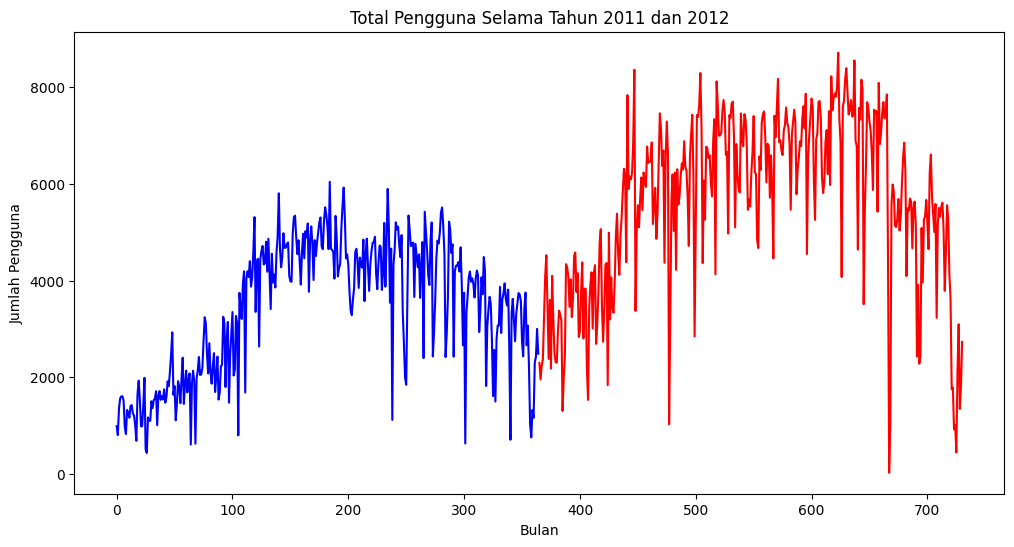

In [10]:
daybyYear2011['cnt'].plot(figsize=(12, 6), linestyle='-', color='b')
daybyYear2012['cnt'].plot(figsize=(12, 6), linestyle='-', color='r')
# Atur label dan judul
plt.title('Total Pengguna Selama Tahun 2011 dan 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.show()

### Pertanyaan 2:

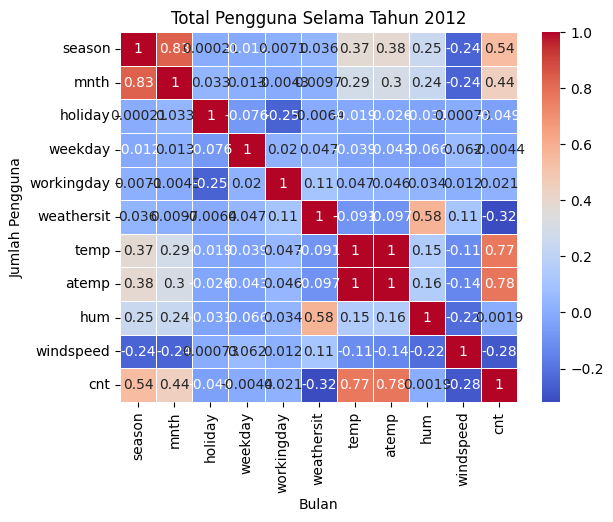

Korelasi dengan kolom 'cnt':
season        0.541794
mnth          0.444607
holiday      -0.049193
weekday      -0.004396
workingday    0.020661
weathersit   -0.318274
temp          0.771214
atemp         0.775294
hum           0.001898
windspeed    -0.278000
Name: cnt, dtype: float64


In [ ]:
correlation_matrix = daybyYear2011.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Total Pengguna Selama Tahun 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.show()

cnt_correlation = correlation_matrix['cnt'].drop('cnt')
print("Korelasi dengan kolom 'cnt':")
print(cnt_correlation)

## Conclusion

- Conclution pertanyaan 1 : Dilihat dari jumlah penyewa 2 tahun terakhir bisa dibilang bahwasanya usaha bike sharing atau rental sepeda ini berada dalam kondisi yang tidak merugikan tidak pula terlalu menguntungkan pada bulan bulan awal 2011 bahkan sempat mangalami penurunan pada akhir tahun tersebut. Kemudian pada awal tahun 2012 kondisi kembali stabil bahkan semakin meningkat pada pertengahan akhir tahun 2012 sampai akhir mengalami penurunan pada akhir tahun lagi. Ada sebuah pola disini dmna awal nya meningkat secara perlahan sampai ke puncak pada kisaran bulan juli-agustus atau kisaran musim panas ke gugur lalu menurun saat musin dingin. Menurut saya langkah yang tepat adalah mengurangi jumlah sepeda pada saat musim dingin dan berikan perawatan pada unit sepeda agar siap menghadapi puncak penyewaan pada musim panas ke gugur pada tahun berikut nya sehingga saat terjadinya lonjakan penyewaan sepeda dalam kondisi aman sehingga mengurangi resiko kerusakan fatal yang bisa menyebabkan kerugian lebih besar jika tidak diberikan perawatan pada sepeda
- conclution pertanyaan 2 : Pada visualisasi kedua saya menampilkan matriks korelasi setiap kolom untuk melihat kuat tidaknya korelasi yang dimiliki setiap kolom pada kolom yang lain dengan acuan kolom 'cnt' yang mana adalah total penyewaan sepeda. pada tabel tersebut dapat dilihat bahwa kolom temp dan atemp yang sama sama berisi data suhu pada hari tersebut memiliki korelasi yang kuat. Hal ini memberikan kesimpulan bahwa kondisi suhu yang sesuai akan meningkat minat seseorang untuk bersepeda hal ini bisa menjadi acuan dimana kita bisa meningkatkan penyewaan saat suhu pada hari tersebut nyaman untuk dinikmati dengan bersepeda